# Investor - Flow of Funds - US

### Introducción:

Un agradecimiento especial a: https://github.com/rgrp por compartir el conjunto de datos.


### Paso 1. Importar las librerías necesarias

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser

### Paso 2. Importar el conjunto de datos desde esta [dirección](https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv). 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv", sep= ",")

### Paso 3. Asignarlo a una variable llamada df

In [4]:
df.head()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
1,2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2,2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
3,2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
4,2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


### Paso 4.  ¿Cuál es la frecuencia del conjunto de datos?

In [8]:
#print(df.index.freq)

In [9]:
print(pd.infer_freq(df))

None


### Paso 5. Establece la columna Date como índice

In [10]:
df.set_index(["Date"], inplace=True)

In [11]:
df.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


### Paso 6. ¿Cuál es el tipo del índice?

In [12]:
df.index

Index(['2012-12-05', '2012-12-12', '2012-12-19', '2012-12-26', '2013-01-02',
       '2013-01-09', '2014-04-02', '2014-04-09', '2014-04-16', '2014-04-23',
       '2014-04-30', '2014-05-07', '2014-05-14', '2014-05-21', '2014-05-28',
       '2014-06-04', '2014-06-11', '2014-06-18', '2014-06-25', '2014-07-02',
       '2014-07-09', '2014-07-30', '2014-08-06', '2014-08-13', '2014-08-20',
       '2014-08-27', '2014-09-03', '2014-09-10', '2014-11-05', '2014-11-12',
       '2014-11-19', '2014-11-25', '2015-01-07', '2015-01-14', '2015-01-21',
       '2015-01-28', '2015-02-04', '2015-02-11', '2015-03-04', '2015-03-11',
       '2015-03-18', '2015-03-25', '2015-04-01', '2015-04-08'],
      dtype='object', name='Date')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 2012-12-05 to 2015-04-08
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Total Equity     44 non-null     int64
 1   Domestic Equity  44 non-null     int64
 2   World Equity     44 non-null     int64
 3   Hybrid           44 non-null     int64
 4   Total Bond       44 non-null     int64
 5   Taxable Bond     44 non-null     int64
 6   Municipal Bond   44 non-null     int64
 7   Total            44 non-null     int64
dtypes: int64(8)
memory usage: 3.1+ KB


### Paso 7. Establece el índice como DatetimeIndex

In [14]:
df.index = pd.to_datetime(df.index, dayfirst=True)
df.info()
df.index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44 entries, 2012-12-05 to 2015-04-08
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Total Equity     44 non-null     int64
 1   Domestic Equity  44 non-null     int64
 2   World Equity     44 non-null     int64
 3   Hybrid           44 non-null     int64
 4   Total Bond       44 non-null     int64
 5   Taxable Bond     44 non-null     int64
 6   Municipal Bond   44 non-null     int64
 7   Total            44 non-null     int64
dtypes: int64(8)
memory usage: 3.1 KB


DatetimeIndex(['2012-12-05', '2012-12-12', '2012-12-19', '2012-12-26',
               '2013-01-02', '2013-01-09', '2014-04-02', '2014-04-09',
               '2014-04-16', '2014-04-23', '2014-04-30', '2014-05-07',
               '2014-05-14', '2014-05-21', '2014-05-28', '2014-06-04',
               '2014-06-11', '2014-06-18', '2014-06-25', '2014-07-02',
               '2014-07-09', '2014-07-30', '2014-08-06', '2014-08-13',
               '2014-08-20', '2014-08-27', '2014-09-03', '2014-09-10',
               '2014-11-05', '2014-11-12', '2014-11-19', '2014-11-25',
               '2015-01-07', '2015-01-14', '2015-01-21', '2015-01-28',
               '2015-02-04', '2015-02-11', '2015-03-04', '2015-03-11',
               '2015-03-18', '2015-03-25', '2015-04-01', '2015-04-08'],
              dtype='datetime64[ns]', name='Date', freq=None)

### Paso 8.  Cambia la frecuencia a mensual, suma los valores y asígnalo a mensual.

In [15]:
mensual = df.resample("M").sum()

### Paso 9. Notarás que se llenó el dataFrame con meses que no tienen ningún dato con ceros. Eliminemos estas filas.

In [16]:
mensual.drop_duplicates(inplace=True)

In [17]:
mensual

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-01-31,3661,-1627,5288,2730,12149,9414,2735,18540
2013-02-28,0,0,0,0,0,0,0,0
2014-04-30,10842,1048,9794,4931,8493,7193,1300,24267
2014-05-31,-2203,-8720,6518,3172,13767,10192,3576,14736
2014-06-30,2319,-6546,8865,4588,9715,7551,2163,16621
2014-07-31,-7051,-11128,4078,2666,7506,7026,481,3122
2014-08-31,1943,-5508,7452,1885,1897,-1013,2910,5723
2014-09-30,-2767,-6596,3829,1599,3984,2479,1504,2816


### Paso 10. Bien, ya tenemos los datos mensuales. Ahora cambiamos la frecuencia a anual.

In [18]:
anual = mensual.resample("Y").sum()

In [19]:
anual

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-12-31,3661,-1627,5288,2730,12149,9414,2735,18540
2014-12-31,330,-44689,45021,19570,59890,44994,14896,79787
2015-12-31,15049,-10459,25508,7280,26028,17986,8041,48357


In [20]:
# COMO NO SÉ SI EL EJERCICIO QUIERE QUE HAGA EL ANUAL DEL MENSUAL, O EL ANUAL DEL DF ENTERO, ARRIBA ESTÁ EL DEL MENSUAL Y AQUÍ HAGO EL OTRO.

anual_1 = df.resample("Y").sum()

In [21]:
anual_1

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-12-31,3661,-1627,5288,2730,12149,9414,2735,18540
2014-12-31,330,-44689,45021,19570,59890,44994,14896,79787
2015-12-31,15049,-10459,25508,7280,26028,17986,8041,48357


### BONUS: Crea tu propia pregunta y respóndela.

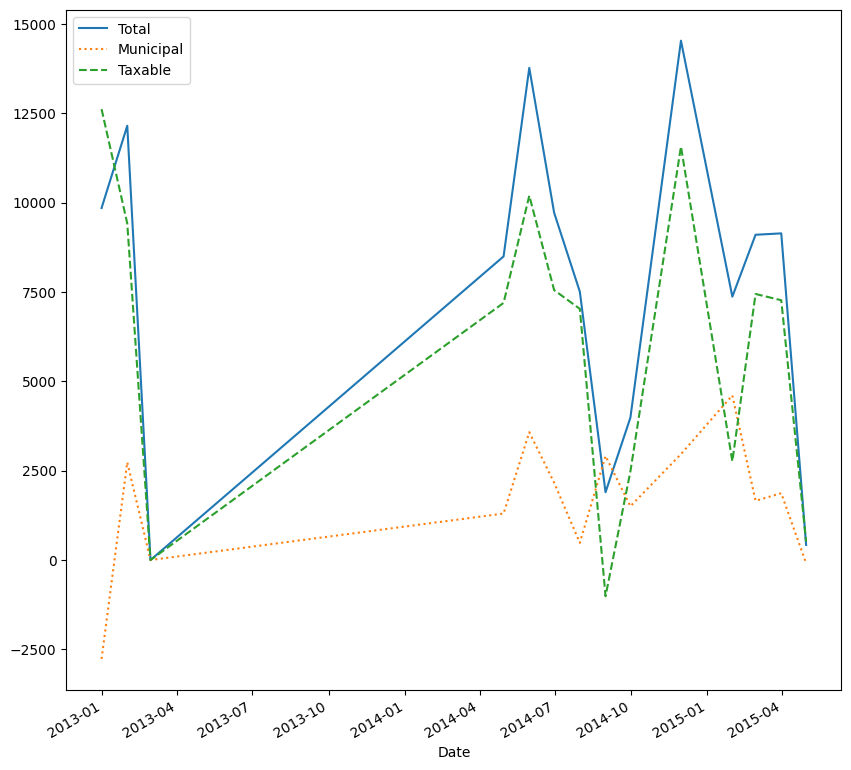

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
mensual['Total Bond'].plot(alpha=1, style='-')
mensual['Municipal Bond'].plot(style=':')
mensual['Taxable Bond'].plot(style='--');

plt.legend(['Total', 'Municipal', 'Taxable'],
           loc='upper left');